INSTITUTO TECNOLOGICO Y DE ESTUDIOS SUPERIORES DE MONTERREY

 CAMPUS PUEBLA

ANALITICA DE DATOS Y HERRAMIENTAS DE INTELIGENCIA ARTIFICIAL II

PREPARACIÓN DE LOS DATOS (Valores Atípicos)

ALUMNO:

Ángel Roberto González Angulo | A01735880


PROFESORES:

Alfredo García Suárez

Candy Yuridiana Alemán Muñoz

Juan Manuel Ahuactzin Larios

Rigoberto Cerino Jiménez

GRUPO:
501


FECHA DE ENTREGA:
aa/aa/aaaa

## Librerías y lectura de la base

In [79]:
# Importar las librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import ast

In [80]:
# Leer la base de la ciudad de Ottawa limpia
df = pd.read_excel("OttawaLimpio.xlsx")
df.drop("Unnamed: 0", axis = 1, inplace = True)
df.head(6)

,last_scraped,source,host_name,host_response_time,host_verifications,neighbourhood_cleansed,property_type,room_type,bathrooms_text,amenities,...,room_type_num,neighbourhood_cleansed_num,host_response_time_num,bathroom_text_clean,bathroom_text_num,amenities_num,host_verifications_num,priceMex,priceMexCategory,priceMexCategory_num
0,2024-06-21,city scrape,Glenn,within an hour,"['email', 'phone']",Kitchissippi,Entire rental unit,Entire home/apt,1 bath,"[""Kitchen"", ""Shampoo"", ""Coffee maker"", ""Smoke ...",...,0,12,3,bath,3,28,2,2549.40,"Básico (320.5 - 6,913.18)",0
1,2024-06-21,city scrape,Daniel,within a day,"['email', 'phone']",Rideau-Goulbourn,Entire home,Entire home/apt,1 bath,"[""Extra pillows and blankets"", ""Kitchen"", ""Sha...",...,0,16,1,bath,3,61,2,2913.60,"Básico (320.5 - 6,913.18)",0
2,2024-06-21,city scrape,Ela,within an hour,"['email', 'phone']",Capital,Private room in home,Private room,1 private bath,"[""Free washer \u2013 In building"", ""Extra pill...",...,1,4,3,private bath,4,49,2,1078.03,"Básico (320.5 - 6,913.18)",0
3,2024-06-21,city scrape,William,within an hour,['phone'],Gloucester-South Nepean,Entire home,Entire home/apt,1 bath,"[""Kitchen"", ""Shampoo"", ""Host greets you"", ""Smo...",...,0,7,3,bath,3,27,1,961.49,"Básico (320.5 - 6,913.18)",0
4,2024-06-21,city scrape,Greg And Valerie,within an hour,"['email', 'phone', 'work_email']",Kitchissippi,Entire home,Entire home/apt,1 bath,"[""Extra pillows and blankets"", ""Self check-in""...",...,0,12,3,bath,3,45,3,1325.69,"Básico (320.5 - 6,913.18)",0
5,2024-06-21,city scrape,Greg And Valerie,within an hour,"['email', 'phone', 'work_email']",Kitchissippi,Entire townhouse,Entire home/apt,1 bath,"[""Self check-in"", ""Free driveway parking on pr...",...,0,12,3,bath,3,57,3,1879.27,"Básico (320.5 - 6,913.18)",0


In [81]:
#Comprobamos nulos
df.isnull().sum().sum()

np.int64(0)

In [82]:
# Vemos la información del dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2862 entries, 0 to 2861
Data columns (total 55 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   last_scraped                    2862 non-null   object 
 1   source                          2862 non-null   object 
 2   host_name                       2862 non-null   object 
 3   host_response_time              2862 non-null   object 
 4   host_verifications              2862 non-null   object 
 5   neighbourhood_cleansed          2862 non-null   object 
 6   property_type                   2862 non-null   object 
 7   room_type                       2862 non-null   object 
 8   bathrooms_text                  2862 non-null   object 
 9   amenities                       2862 non-null   object 
 10  calendar_last_scraped           2862 non-null   object 
 11  host_id                         2862 non-null   int64  
 12  host_since                      28

In [83]:
# Separamos los datos cuantitativos
cuantitativas = df.select_dtypes(np.number)
cuantitativas

,host_id,host_since,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,latitude,...,reviews_per_month,host_years,room_type_num,neighbourhood_cleansed_num,host_response_time_num,bathroom_text_num,amenities_num,host_verifications_num,priceMex,priceMexCategory_num
0,1369632,2011,100.0,94.0,1,1,1,1,1,45.390840,...,0.65,13,0,12,3,3,28,2,2549.40,0
1,415201,2011,100.0,100.0,0,1,1,1,1,45.168200,...,0.04,13,0,16,1,3,61,2,2913.60,0
2,2401179,2012,100.0,96.0,1,5,5,1,1,45.405500,...,0.12,12,1,4,3,4,49,2,1078.03,0
3,2058676,2012,100.0,82.0,1,1,8,1,1,45.269100,...,0.57,12,0,7,3,3,27,1,961.49,0
4,3201295,2012,100.0,89.0,0,6,8,1,1,45.404550,...,0.09,12,0,12,3,3,45,3,1325.69,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2857,104583371,2016,100.0,100.0,0,3,3,1,1,45.323071,...,1.16,8,1,7,3,4,35,2,874.08,0
2858,348027803,2020,100.0,100.0,1,2,3,1,1,45.419361,...,1.16,4,1,18,3,3,9,2,509.88,0
2859,85297148,2016,100.0,98.0,0,84,897,1,1,45.093966,...,1.16,8,0,15,3,3,57,3,7473.38,3
2860,21218752,2014,94.8,87.5,0,1,2,1,1,45.402610,...,1.16,10,0,12,3,3,4,3,1165.44,0


In [84]:
# Separamos los datos cualitativos
cualitativas = df.select_dtypes(include=['object'])
cualitativas

,last_scraped,source,host_name,host_response_time,host_verifications,neighbourhood_cleansed,property_type,room_type,bathrooms_text,amenities,calendar_last_scraped,bathroom_text_clean,priceMexCategory
0,2024-06-21,city scrape,Glenn,within an hour,"['email', 'phone']",Kitchissippi,Entire rental unit,Entire home/apt,1 bath,"[""Kitchen"", ""Shampoo"", ""Coffee maker"", ""Smoke ...",2024-06-21,bath,"Básico (320.5 - 6,913.18)"
1,2024-06-21,city scrape,Daniel,within a day,"['email', 'phone']",Rideau-Goulbourn,Entire home,Entire home/apt,1 bath,"[""Extra pillows and blankets"", ""Kitchen"", ""Sha...",2024-06-21,bath,"Básico (320.5 - 6,913.18)"
2,2024-06-21,city scrape,Ela,within an hour,"['email', 'phone']",Capital,Private room in home,Private room,1 private bath,"[""Free washer \u2013 In building"", ""Extra pill...",2024-06-21,private bath,"Básico (320.5 - 6,913.18)"
3,2024-06-21,city scrape,William,within an hour,['phone'],Gloucester-South Nepean,Entire home,Entire home/apt,1 bath,"[""Kitchen"", ""Shampoo"", ""Host greets you"", ""Smo...",2024-06-21,bath,"Básico (320.5 - 6,913.18)"
4,2024-06-21,city scrape,Greg And Valerie,within an hour,"['email', 'phone', 'work_email']",Kitchissippi,Entire home,Entire home/apt,1 bath,"[""Extra pillows and blankets"", ""Self check-in""...",2024-06-21,bath,"Básico (320.5 - 6,913.18)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2857,2024-06-21,city scrape,Vivek,within an hour,"['email', 'phone']",Gloucester-South Nepean,Private room in home,Private room,1 private bath,"[""Extra pillows and blankets"", ""Shampoo"", ""Hos...",2024-06-21,private bath,"Básico (320.5 - 6,913.18)"
2858,2024-06-21,city scrape,Tatiana,within an hour,"['email', 'phone']",Rideau-Vanier,Private room in rental unit,Private room,1 bath,"[""Washer"", ""Carbon monoxide alarm"", ""Kitchen"",...",2024-06-21,bath,"Básico (320.5 - 6,913.18)"
2859,2024-06-21,city scrape,Genevieve,within an hour,"['email', 'phone', 'work_email']",Osgoode,Entire home,Entire home/apt,3 baths,"[""Extra pillows and blankets"", ""Self check-in""...",2024-06-21,bath,"Muy Económico (6,913.19 - 13,505.86)"
2860,2024-06-21,city scrape,Shannon,within an hour,"['email', 'phone', 'work_email']",Kitchissippi,Entire rental unit,Entire home/apt,1 bath,"[""Free parking on premises"", ""Washer"", ""Air co...",2024-06-21,bath,"Básico (320.5 - 6,913.18)"


## Diagramas de caja

<Figure size 1500x800 with 0 Axes>

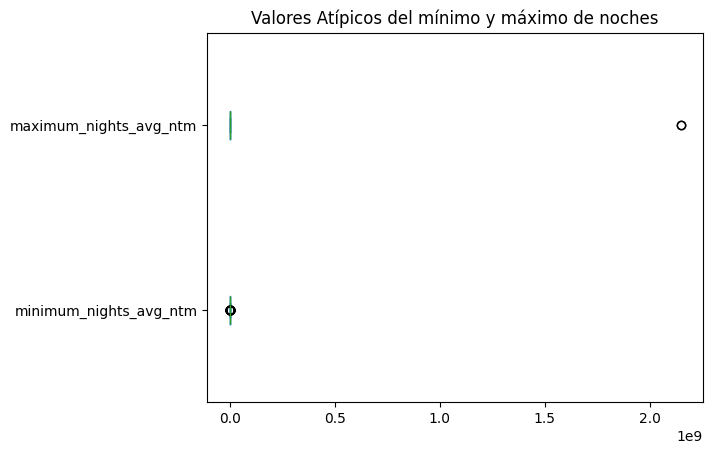

In [85]:
# Dividimos el dataframe en subconjuntos para ver el boxplot en las proporciones
dfnights = cuantitativas.loc[:, cuantitativas.columns.str.contains("nights")]
# Realizamos diagrama de caja de cada columna cuantitativa del dataframe
fig = plt.figure(figsize = (15,8)) #Dimensiones
dfnights.plot(kind = 'box', vert = False) # Vert = (Orientación)
plt.title("Valores Atípicos del mínimo y máximo de noches")
plt.show() #Se muestra el diagrama

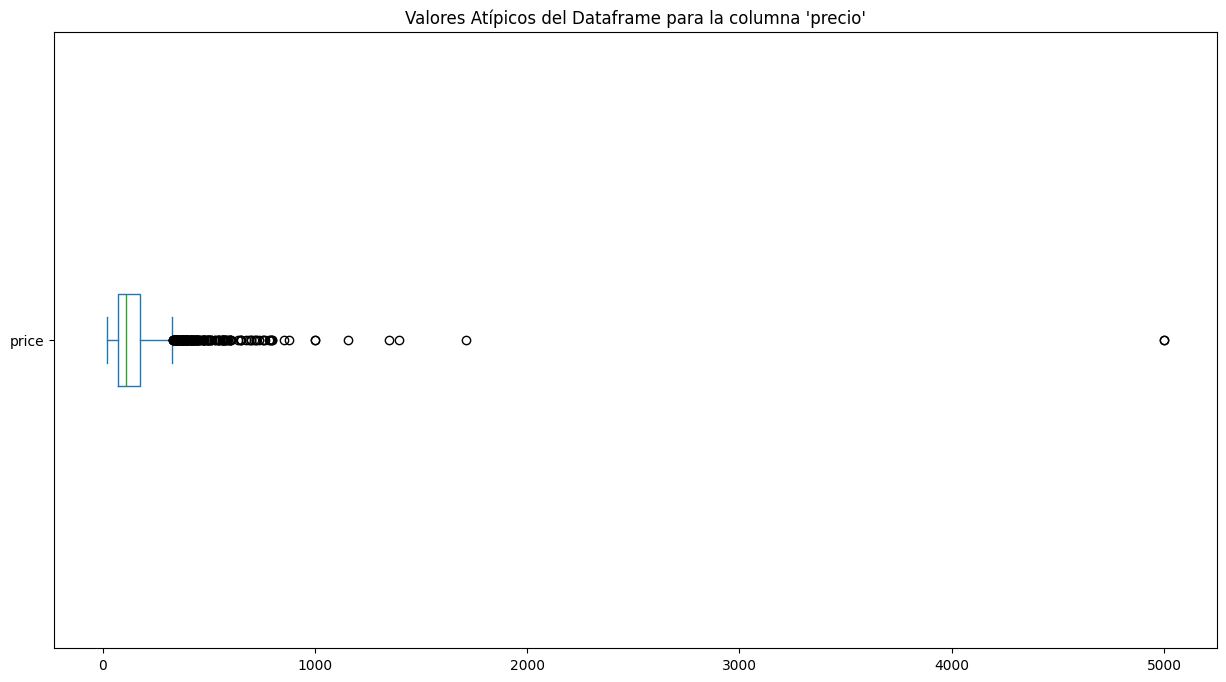

In [86]:
# Dividimos el dataframe en subconjuntos para ver el boxplot en las proporciones
dfPrices = cuantitativas["price"]
# Realizamos diagrama de caja de cada columna cuantitativa del dataframe
fig = plt.figure(figsize = (15,8)) #Dimensiones
dfPrices.plot(kind = 'box', vert = False) # Vert = (Orientación)
plt.title("Valores Atípicos del Dataframe para la columna 'precio'")
plt.show() #Se muestra el diagrama

<Figure size 1500x800 with 0 Axes>

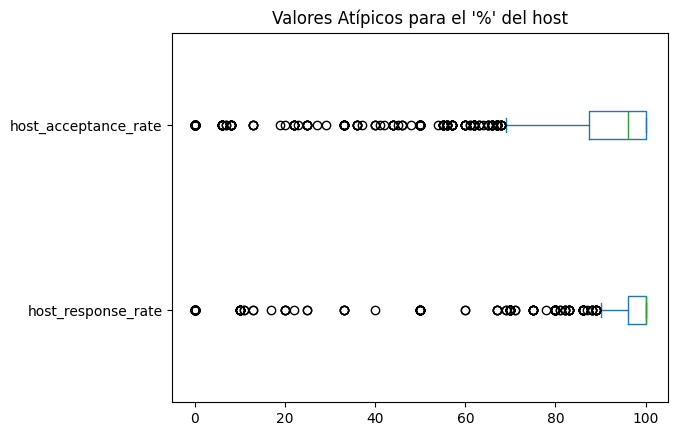

In [87]:
# Dividimos el dataframe en subconjuntos para ver el boxplot en las proporciones
dfHost = cuantitativas.loc[:, cuantitativas.columns.str.contains("rate")]
# Realizamos diagrama de caja de cada columna cuantitativa del dataframe
fig = plt.figure(figsize = (15,8)) #Dimensiones
dfHost.plot(kind = 'box', vert = False) # Vert = (Orientación)
plt.title("Valores Atípicos para el '%' del host")
plt.show() #Se muestra el diagrama

<Figure size 1500x800 with 0 Axes>

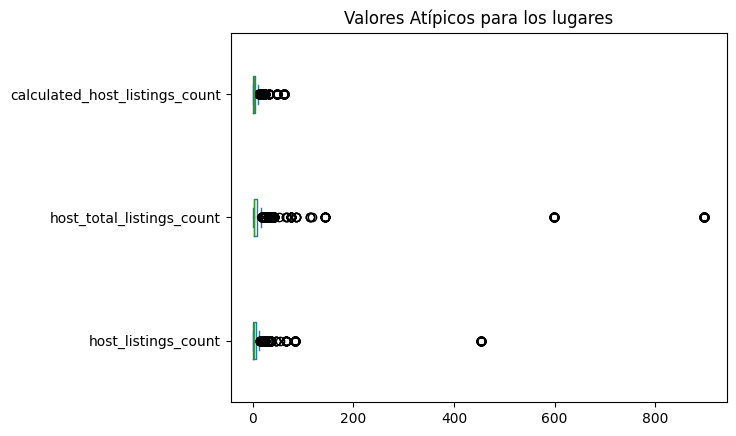

In [88]:
# Dividimos el dataframe en subconjuntos para ver el boxplot en las proporciones
dfListings = cuantitativas.loc[:, cuantitativas.columns.str.contains("listings")]
# Realizamos diagrama de caja de cada columna cuantitativa del dataframe
fig = plt.figure(figsize = (15,8)) #Dimensiones
dfListings.plot(kind = 'box', vert = False) # Vert = (Orientación)
plt.title("Valores Atípicos para los lugares")
plt.show() #Se muestra el diagrama

<Figure size 1500x800 with 0 Axes>

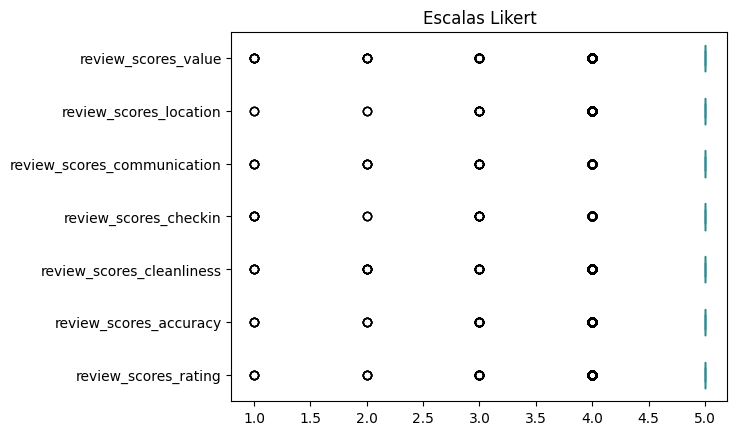

In [89]:
# Dividimos el dataframe en subconjuntos para ver el boxplot en las proporciones
dfReviews = cuantitativas.loc[:, cuantitativas.columns.str.contains("scores")]
# Realizamos diagrama de caja de cada columna cuantitativa del dataframe
fig = plt.figure(figsize = (15,8)) #Dimensiones
dfReviews.plot(kind = 'box', vert = False) # Vert = (Orientación)
plt.title("Escalas Likert")
plt.show() #Se muestra el diagrama

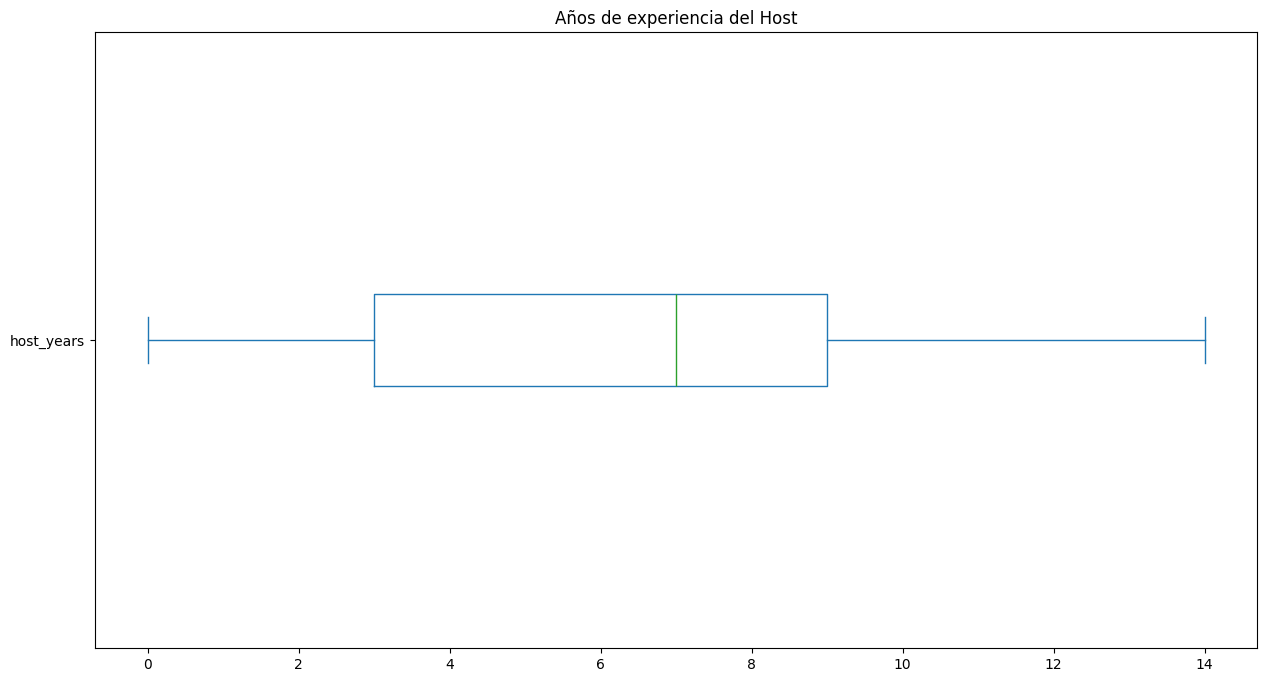

In [90]:
# Dividimos el dataframe en subconjuntos para ver el boxplot en las proporciones
dfHostYears = cuantitativas["host_years"]
# Realizamos diagrama de caja de cada columna cuantitativa del dataframe
fig = plt.figure(figsize = (15,8)) #Dimensiones
dfHostYears.plot(kind = 'box', vert = False) # Vert = (Orientación)
plt.title("Años de experiencia del Host")
plt.show() #Se muestra el diagrama

## Eliminación de outliers por medio de la desviación estándar (No seleccionado)

Para ninguno de los métodos aplicados se toman en cuenta aquellas columnas en escala de likert

In [91]:
# Guardamos el dataframe sin escalas Likert
cuantitativasNoLikert = cuantitativas.drop(cuantitativas.columns[cuantitativas.columns.str.contains("scores")], axis=1)
cuantitativasNoLikert

,host_id,host_since,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,latitude,...,reviews_per_month,host_years,room_type_num,neighbourhood_cleansed_num,host_response_time_num,bathroom_text_num,amenities_num,host_verifications_num,priceMex,priceMexCategory_num
0,1369632,2011,100.0,94.0,1,1,1,1,1,45.390840,...,0.65,13,0,12,3,3,28,2,2549.40,0
1,415201,2011,100.0,100.0,0,1,1,1,1,45.168200,...,0.04,13,0,16,1,3,61,2,2913.60,0
2,2401179,2012,100.0,96.0,1,5,5,1,1,45.405500,...,0.12,12,1,4,3,4,49,2,1078.03,0
3,2058676,2012,100.0,82.0,1,1,8,1,1,45.269100,...,0.57,12,0,7,3,3,27,1,961.49,0
4,3201295,2012,100.0,89.0,0,6,8,1,1,45.404550,...,0.09,12,0,12,3,3,45,3,1325.69,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2857,104583371,2016,100.0,100.0,0,3,3,1,1,45.323071,...,1.16,8,1,7,3,4,35,2,874.08,0
2858,348027803,2020,100.0,100.0,1,2,3,1,1,45.419361,...,1.16,4,1,18,3,3,9,2,509.88,0
2859,85297148,2016,100.0,98.0,0,84,897,1,1,45.093966,...,1.16,8,0,15,3,3,57,3,7473.38,3
2860,21218752,2014,94.8,87.5,0,1,2,1,1,45.402610,...,1.16,10,0,12,3,3,4,3,1165.44,0


In [92]:
# Guardamos el dataframe solo con escalas Likert
dfReviews

,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
0,5,5,5,5,5,5,5
1,5,5,5,5,5,5,5
2,5,5,5,5,5,5,5
3,5,5,5,5,5,5,5
4,5,5,5,5,5,5,5
...,...,...,...,...,...,...,...
2857,5,5,5,5,5,5,5
2858,5,5,5,5,5,5,5
2859,5,5,5,5,5,5,5
2860,5,5,5,5,5,5,5


In [93]:
#Método aplicando desviación Estándar, encuentra los valores extremos
y = cuantitativasNoLikert
Limite_Superior = y.mean() + 3*y.std()
Limite_Inferior = y.mean() - 3*y.std()
print("Límite superior permitido:\n\n", Limite_Superior)
print("Límite inferior permitido:\n\n", Limite_Inferior)

Límite superior permitido:

 host_id                           7.811682e+08
host_since                        2.027759e+03
host_response_rate                1.455517e+02
host_acceptance_rate              1.515536e+02
host_is_superhost                 2.160910e+00
host_listings_count               1.941882e+02
host_total_listings_count         4.904247e+02
host_has_profile_pic              1.544842e+00
host_identity_verified            1.690809e+00
latitude                          4.558851e+01
longitude                        -7.537187e+01
accommodates                      1.121803e+01
bathrooms                         3.450107e+00
bedrooms                          5.245681e+00
beds                              6.404974e+00
price                             6.797475e+02
minimum_nights_avg_ntm            9.332810e+01
maximum_nights_avg_ntm            1.717780e+08
availability_30                   4.564974e+01
availability_365                  5.454278e+02
number_of_reviews              

In [94]:
# Obtenemos los datos y los outliers se convierten en nulos en el dataframe
OutliersNull = cuantitativasNoLikert[(y <= Limite_Superior) & (y >= Limite_Inferior)]
OutliersNull

,host_id,host_since,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,latitude,...,reviews_per_month,host_years,room_type_num,neighbourhood_cleansed_num,host_response_time_num,bathroom_text_num,amenities_num,host_verifications_num,priceMex,priceMexCategory_num
0,1369632,2011,100.0,94.0,1,1.0,1.0,1.0,1.0,45.390840,...,0.65,13,0.0,12,3.0,3.0,28.0,2.0,2549.40,0.0
1,415201,2011,100.0,100.0,0,1.0,1.0,1.0,1.0,45.168200,...,0.04,13,0.0,16,1.0,3.0,61.0,2.0,2913.60,0.0
2,2401179,2012,100.0,96.0,1,5.0,5.0,1.0,1.0,45.405500,...,0.12,12,1.0,4,3.0,4.0,49.0,2.0,1078.03,0.0
3,2058676,2012,100.0,82.0,1,1.0,8.0,1.0,1.0,45.269100,...,0.57,12,0.0,7,3.0,3.0,27.0,1.0,961.49,0.0
4,3201295,2012,100.0,89.0,0,6.0,8.0,1.0,1.0,45.404550,...,0.09,12,0.0,12,3.0,3.0,45.0,3.0,1325.69,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2857,104583371,2016,100.0,100.0,0,3.0,3.0,1.0,1.0,45.323071,...,1.16,8,1.0,7,3.0,4.0,35.0,2.0,874.08,0.0
2858,348027803,2020,100.0,100.0,1,2.0,3.0,1.0,1.0,45.419361,...,1.16,4,1.0,18,3.0,3.0,9.0,2.0,509.88,0.0
2859,85297148,2016,100.0,98.0,0,84.0,NaN,1.0,1.0,NaN,...,1.16,8,0.0,15,3.0,3.0,57.0,3.0,7473.38,NaN
2860,21218752,2014,94.8,87.5,0,1.0,2.0,1.0,1.0,45.402610,...,1.16,10,0.0,12,3.0,3.0,4.0,3.0,1165.44,0.0


In [95]:
# Contar los outliers utilizando el método de outliers por desviación estándar
OutliersNull.isnull().sum()

host_id                             0
host_since                          0
host_response_rate                 86
host_acceptance_rate              116
host_is_superhost                   0
host_listings_count                49
host_total_listings_count         112
host_has_profile_pic              113
host_identity_verified            197
latitude                           11
longitude                          41
accommodates                       38
bathrooms                          92
bedrooms                           20
beds                               36
price                              25
minimum_nights_avg_ntm             30
maximum_nights_avg_ntm              2
availability_30                     0
availability_365                    0
number_of_reviews                  66
number_of_reviews_ltm              53
number_of_reviews_l30d             58
instant_bookable                    0
calculated_host_listings_count    112
reviews_per_month                  34
host_years  

In [96]:
# Reemplazar valores atípicos (nulos) del dataframe con el promedio
# Realizamos una copia del dataframe
dfCleanDesv = OutliersNull.copy()
dfCleanDesv = dfCleanDesv.fillna(round(OutliersNull.mean(),1))
dfCleanDesv

,host_id,host_since,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,latitude,...,reviews_per_month,host_years,room_type_num,neighbourhood_cleansed_num,host_response_time_num,bathroom_text_num,amenities_num,host_verifications_num,priceMex,priceMexCategory_num
0,1369632,2011,100.0,94.0,1,1.0,1.0,1.0,1.0,45.390840,...,0.65,13,0.0,12,3.0,3.0,28.0,2.0,2549.40,0.0
1,415201,2011,100.0,100.0,0,1.0,1.0,1.0,1.0,45.168200,...,0.04,13,0.0,16,1.0,3.0,61.0,2.0,2913.60,0.0
2,2401179,2012,100.0,96.0,1,5.0,5.0,1.0,1.0,45.405500,...,0.12,12,1.0,4,3.0,4.0,49.0,2.0,1078.03,0.0
3,2058676,2012,100.0,82.0,1,1.0,8.0,1.0,1.0,45.269100,...,0.57,12,0.0,7,3.0,3.0,27.0,1.0,961.49,0.0
4,3201295,2012,100.0,89.0,0,6.0,8.0,1.0,1.0,45.404550,...,0.09,12,0.0,12,3.0,3.0,45.0,3.0,1325.69,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2857,104583371,2016,100.0,100.0,0,3.0,3.0,1.0,1.0,45.323071,...,1.16,8,1.0,7,3.0,4.0,35.0,2.0,874.08,0.0
2858,348027803,2020,100.0,100.0,1,2.0,3.0,1.0,1.0,45.419361,...,1.16,4,1.0,18,3.0,3.0,9.0,2.0,509.88,0.0
2859,85297148,2016,100.0,98.0,0,84.0,8.2,1.0,1.0,45.400000,...,1.16,8,0.0,15,3.0,3.0,57.0,3.0,7473.38,0.0
2860,21218752,2014,94.8,87.5,0,1.0,2.0,1.0,1.0,45.402610,...,1.16,10,0.0,12,3.0,3.0,4.0,3.0,1165.44,0.0


In [97]:
# Corroboramos los valores nulos en el data clean
dfCleanDesv.isnull().sum().sum()

np.int64(0)

In [98]:
# Unimos las columnas cualitativas y las cuantitativas procesadas de outliers por método de desviación estándar
dfDesviacionEstandar = pd.concat([cualitativas, dfCleanDesv], axis=1)
dfDesviacionEstandar

,last_scraped,source,host_name,host_response_time,host_verifications,neighbourhood_cleansed,property_type,room_type,bathrooms_text,amenities,...,reviews_per_month,host_years,room_type_num,neighbourhood_cleansed_num,host_response_time_num,bathroom_text_num,amenities_num,host_verifications_num,priceMex,priceMexCategory_num
0,2024-06-21,city scrape,Glenn,within an hour,"['email', 'phone']",Kitchissippi,Entire rental unit,Entire home/apt,1 bath,"[""Kitchen"", ""Shampoo"", ""Coffee maker"", ""Smoke ...",...,0.65,13,0.0,12,3.0,3.0,28.0,2.0,2549.40,0.0
1,2024-06-21,city scrape,Daniel,within a day,"['email', 'phone']",Rideau-Goulbourn,Entire home,Entire home/apt,1 bath,"[""Extra pillows and blankets"", ""Kitchen"", ""Sha...",...,0.04,13,0.0,16,1.0,3.0,61.0,2.0,2913.60,0.0
2,2024-06-21,city scrape,Ela,within an hour,"['email', 'phone']",Capital,Private room in home,Private room,1 private bath,"[""Free washer \u2013 In building"", ""Extra pill...",...,0.12,12,1.0,4,3.0,4.0,49.0,2.0,1078.03,0.0
3,2024-06-21,city scrape,William,within an hour,['phone'],Gloucester-South Nepean,Entire home,Entire home/apt,1 bath,"[""Kitchen"", ""Shampoo"", ""Host greets you"", ""Smo...",...,0.57,12,0.0,7,3.0,3.0,27.0,1.0,961.49,0.0
4,2024-06-21,city scrape,Greg And Valerie,within an hour,"['email', 'phone', 'work_email']",Kitchissippi,Entire home,Entire home/apt,1 bath,"[""Extra pillows and blankets"", ""Self check-in""...",...,0.09,12,0.0,12,3.0,3.0,45.0,3.0,1325.69,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2857,2024-06-21,city scrape,Vivek,within an hour,"['email', 'phone']",Gloucester-South Nepean,Private room in home,Private room,1 private bath,"[""Extra pillows and blankets"", ""Shampoo"", ""Hos...",...,1.16,8,1.0,7,3.0,4.0,35.0,2.0,874.08,0.0
2858,2024-06-21,city scrape,Tatiana,within an hour,"['email', 'phone']",Rideau-Vanier,Private room in rental unit,Private room,1 bath,"[""Washer"", ""Carbon monoxide alarm"", ""Kitchen"",...",...,1.16,4,1.0,18,3.0,3.0,9.0,2.0,509.88,0.0
2859,2024-06-21,city scrape,Genevieve,within an hour,"['email', 'phone', 'work_email']",Osgoode,Entire home,Entire home/apt,3 baths,"[""Extra pillows and blankets"", ""Self check-in""...",...,1.16,8,0.0,15,3.0,3.0,57.0,3.0,7473.38,0.0
2860,2024-06-21,city scrape,Shannon,within an hour,"['email', 'phone', 'work_email']",Kitchissippi,Entire rental unit,Entire home/apt,1 bath,"[""Free parking on premises"", ""Washer"", ""Air co...",...,1.16,10,0.0,12,3.0,3.0,4.0,3.0,1165.44,0.0


## Eliminación de Outliers usando el rango Intercuartilico (Método de Outliers elegido)

In [99]:
# Método aplicando cuartiles. Encuentro cuartiles 0.25 y 0.75
y = cuantitativasNoLikert
percentile25 = y.quantile(0.25) #Q1
percentile75 = y.quantile(0.75) #Q3
iqr = percentile75 - percentile25

LimiteSuperiorIqr = percentile75 + 1.5*iqr
LimiteInferiorIqr = percentile25 + 1.5*iqr

print("Límite superior permitido:\n\n", LimiteSuperiorIqr)
print("Límite inferior permitido:\n\n", LimiteInferiorIqr)

Límite superior permitido:

 host_id                           9.630348e+08
host_since                        2.030000e+03
host_response_rate                1.060000e+02
host_acceptance_rate              1.187500e+02
host_is_superhost                 2.500000e+00
host_listings_count               1.350000e+01
host_total_listings_count         1.700000e+01
host_has_profile_pic              1.000000e+00
host_identity_verified            1.000000e+00
latitude                          4.558891e+01
longitude                        -7.553052e+01
accommodates                      9.500000e+00
bathrooms                         2.250000e+00
bedrooms                          3.500000e+00
beds                              3.500000e+00
price                             3.295000e+02
minimum_nights_avg_ntm            7.350000e+01
maximum_nights_avg_ntm            2.265000e+03
availability_30                   5.450000e+01
availability_365                  6.165000e+02
number_of_reviews              

In [100]:
# Obtener los valores limpios del dataframe
# Obtenemos los datos y los outliers se convierten en nulos en el dataframe
OutliersNullIqr = cuantitativasNoLikert[(y <= Limite_Superior) & (y >= Limite_Inferior)]
OutliersNullIqr

,host_id,host_since,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,latitude,...,reviews_per_month,host_years,room_type_num,neighbourhood_cleansed_num,host_response_time_num,bathroom_text_num,amenities_num,host_verifications_num,priceMex,priceMexCategory_num
0,1369632,2011,100.0,94.0,1,1.0,1.0,1.0,1.0,45.390840,...,0.65,13,0.0,12,3.0,3.0,28.0,2.0,2549.40,0.0
1,415201,2011,100.0,100.0,0,1.0,1.0,1.0,1.0,45.168200,...,0.04,13,0.0,16,1.0,3.0,61.0,2.0,2913.60,0.0
2,2401179,2012,100.0,96.0,1,5.0,5.0,1.0,1.0,45.405500,...,0.12,12,1.0,4,3.0,4.0,49.0,2.0,1078.03,0.0
3,2058676,2012,100.0,82.0,1,1.0,8.0,1.0,1.0,45.269100,...,0.57,12,0.0,7,3.0,3.0,27.0,1.0,961.49,0.0
4,3201295,2012,100.0,89.0,0,6.0,8.0,1.0,1.0,45.404550,...,0.09,12,0.0,12,3.0,3.0,45.0,3.0,1325.69,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2857,104583371,2016,100.0,100.0,0,3.0,3.0,1.0,1.0,45.323071,...,1.16,8,1.0,7,3.0,4.0,35.0,2.0,874.08,0.0
2858,348027803,2020,100.0,100.0,1,2.0,3.0,1.0,1.0,45.419361,...,1.16,4,1.0,18,3.0,3.0,9.0,2.0,509.88,0.0
2859,85297148,2016,100.0,98.0,0,84.0,NaN,1.0,1.0,NaN,...,1.16,8,0.0,15,3.0,3.0,57.0,3.0,7473.38,NaN
2860,21218752,2014,94.8,87.5,0,1.0,2.0,1.0,1.0,45.402610,...,1.16,10,0.0,12,3.0,3.0,4.0,3.0,1165.44,0.0


In [101]:
# Contar los outliers
OutliersNullIqr.isnull().sum()

host_id                             0
host_since                          0
host_response_rate                 86
host_acceptance_rate              116
host_is_superhost                   0
host_listings_count                49
host_total_listings_count         112
host_has_profile_pic              113
host_identity_verified            197
latitude                           11
longitude                          41
accommodates                       38
bathrooms                          92
bedrooms                           20
beds                               36
price                              25
minimum_nights_avg_ntm             30
maximum_nights_avg_ntm              2
availability_30                     0
availability_365                    0
number_of_reviews                  66
number_of_reviews_ltm              53
number_of_reviews_l30d             58
instant_bookable                    0
calculated_host_listings_count    112
reviews_per_month                  34
host_years  

In [102]:
# Reemplazar valores atípicos (nulos) del dataframe con el promedio
# Realizamos una copia del dataframe
dfCleanIqr = OutliersNullIqr.copy()
dfCleanIqr = dfCleanIqr.fillna(round(OutliersNullIqr.mean(),1))
dfCleanIqr

,host_id,host_since,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,latitude,...,reviews_per_month,host_years,room_type_num,neighbourhood_cleansed_num,host_response_time_num,bathroom_text_num,amenities_num,host_verifications_num,priceMex,priceMexCategory_num
0,1369632,2011,100.0,94.0,1,1.0,1.0,1.0,1.0,45.390840,...,0.65,13,0.0,12,3.0,3.0,28.0,2.0,2549.40,0.0
1,415201,2011,100.0,100.0,0,1.0,1.0,1.0,1.0,45.168200,...,0.04,13,0.0,16,1.0,3.0,61.0,2.0,2913.60,0.0
2,2401179,2012,100.0,96.0,1,5.0,5.0,1.0,1.0,45.405500,...,0.12,12,1.0,4,3.0,4.0,49.0,2.0,1078.03,0.0
3,2058676,2012,100.0,82.0,1,1.0,8.0,1.0,1.0,45.269100,...,0.57,12,0.0,7,3.0,3.0,27.0,1.0,961.49,0.0
4,3201295,2012,100.0,89.0,0,6.0,8.0,1.0,1.0,45.404550,...,0.09,12,0.0,12,3.0,3.0,45.0,3.0,1325.69,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2857,104583371,2016,100.0,100.0,0,3.0,3.0,1.0,1.0,45.323071,...,1.16,8,1.0,7,3.0,4.0,35.0,2.0,874.08,0.0
2858,348027803,2020,100.0,100.0,1,2.0,3.0,1.0,1.0,45.419361,...,1.16,4,1.0,18,3.0,3.0,9.0,2.0,509.88,0.0
2859,85297148,2016,100.0,98.0,0,84.0,8.2,1.0,1.0,45.400000,...,1.16,8,0.0,15,3.0,3.0,57.0,3.0,7473.38,0.0
2860,21218752,2014,94.8,87.5,0,1.0,2.0,1.0,1.0,45.402610,...,1.16,10,0.0,12,3.0,3.0,4.0,3.0,1165.44,0.0


In [103]:
# Comprobamos que hemos reemplazado los datos correctamente
dfCleanIqr.isnull().sum().sum()

np.int64(0)

In [104]:
# Unimos las columnas cualitativas y las cuantitativas procesadas de outliers por método de desviación estándar
dfLimpioIqr = pd.concat([dfReviews, dfCleanIqr], axis=1)
dfLimpio = pd.concat([cualitativas, dfLimpioIqr], axis=1)
dfLimpio

,last_scraped,source,host_name,host_response_time,host_verifications,neighbourhood_cleansed,property_type,room_type,bathrooms_text,amenities,...,reviews_per_month,host_years,room_type_num,neighbourhood_cleansed_num,host_response_time_num,bathroom_text_num,amenities_num,host_verifications_num,priceMex,priceMexCategory_num
0,2024-06-21,city scrape,Glenn,within an hour,"['email', 'phone']",Kitchissippi,Entire rental unit,Entire home/apt,1 bath,"[""Kitchen"", ""Shampoo"", ""Coffee maker"", ""Smoke ...",...,0.65,13,0.0,12,3.0,3.0,28.0,2.0,2549.40,0.0
1,2024-06-21,city scrape,Daniel,within a day,"['email', 'phone']",Rideau-Goulbourn,Entire home,Entire home/apt,1 bath,"[""Extra pillows and blankets"", ""Kitchen"", ""Sha...",...,0.04,13,0.0,16,1.0,3.0,61.0,2.0,2913.60,0.0
2,2024-06-21,city scrape,Ela,within an hour,"['email', 'phone']",Capital,Private room in home,Private room,1 private bath,"[""Free washer \u2013 In building"", ""Extra pill...",...,0.12,12,1.0,4,3.0,4.0,49.0,2.0,1078.03,0.0
3,2024-06-21,city scrape,William,within an hour,['phone'],Gloucester-South Nepean,Entire home,Entire home/apt,1 bath,"[""Kitchen"", ""Shampoo"", ""Host greets you"", ""Smo...",...,0.57,12,0.0,7,3.0,3.0,27.0,1.0,961.49,0.0
4,2024-06-21,city scrape,Greg And Valerie,within an hour,"['email', 'phone', 'work_email']",Kitchissippi,Entire home,Entire home/apt,1 bath,"[""Extra pillows and blankets"", ""Self check-in""...",...,0.09,12,0.0,12,3.0,3.0,45.0,3.0,1325.69,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2857,2024-06-21,city scrape,Vivek,within an hour,"['email', 'phone']",Gloucester-South Nepean,Private room in home,Private room,1 private bath,"[""Extra pillows and blankets"", ""Shampoo"", ""Hos...",...,1.16,8,1.0,7,3.0,4.0,35.0,2.0,874.08,0.0
2858,2024-06-21,city scrape,Tatiana,within an hour,"['email', 'phone']",Rideau-Vanier,Private room in rental unit,Private room,1 bath,"[""Washer"", ""Carbon monoxide alarm"", ""Kitchen"",...",...,1.16,4,1.0,18,3.0,3.0,9.0,2.0,509.88,0.0
2859,2024-06-21,city scrape,Genevieve,within an hour,"['email', 'phone', 'work_email']",Osgoode,Entire home,Entire home/apt,3 baths,"[""Extra pillows and blankets"", ""Self check-in""...",...,1.16,8,0.0,15,3.0,3.0,57.0,3.0,7473.38,0.0
2860,2024-06-21,city scrape,Shannon,within an hour,"['email', 'phone', 'work_email']",Kitchissippi,Entire rental unit,Entire home/apt,1 bath,"[""Free parking on premises"", ""Washer"", ""Air co...",...,1.16,10,0.0,12,3.0,3.0,4.0,3.0,1165.44,0.0


## Procesos de categorización

In [105]:
# Comprobamos que sí estén todos los datos en ambas bases, tanto la inicial como la que tuvo un proceso de limpieza
dfLimpio.info()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2862 entries, 0 to 2861
Data columns (total 55 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   last_scraped                    2862 non-null   object 
 1   source                          2862 non-null   object 
 2   host_name                       2862 non-null   object 
 3   host_response_time              2862 non-null   object 
 4   host_verifications              2862 non-null   object 
 5   neighbourhood_cleansed          2862 non-null   object 
 6   property_type                   2862 non-null   object 
 7   room_type                       2862 non-null   object 
 8   bathrooms_text                  2862 non-null   object 
 9   amenities                       2862 non-null   object 
 10  calendar_last_scraped           2862 non-null   object 
 11  bathroom_text_clean             2862 non-null   object 
 12  priceMexCategory                28

In [106]:
# Asignamos categorías a las columnas de tipo texto con valores numéricos usando la libreria de sklearn
labels = LabelEncoder()
# Convertir la columna de texto a valores numéricos (Categorizar con números)
dfLimpio['room_type_num'] = labels.fit_transform(dfLimpio['room_type'])
dfLimpio['neighbourhood_cleansed_num'] = labels.fit_transform(dfLimpio['neighbourhood_cleansed'])
dfLimpio['host_response_time_num'] = labels.fit_transform(dfLimpio['host_response_time'])

In [107]:
# Obtenemos categorías para bathrooms_text:
dfLimpio['bathroom_text_clean'] = dfLimpio['bathrooms_text'].str.replace(r'^\d*\.?\d*\s?', '', regex=True).str.strip()
dfLimpio['bathroom_text_clean'] = dfLimpio['bathroom_text_clean'].str.replace("baths","bath")
dfLimpio['bathroom_text_clean'] = dfLimpio['bathroom_text_clean'].str.replace("shared baths","shared bath")
dfLimpio['bathroom_text_clean'].value_counts()
# Las volvemos numéricas:
dfLimpio['bathroom_text_num'] = labels.fit_transform(dfLimpio['bathroom_text_clean'])
dfLimpio['bathroom_text_num'].value_counts()

bathroom_text_num
3    2128
5     484
4     241
6       3
0       3
1       2
2       1
Name: count, dtype: int64

In [108]:
# Conteo para la variable "amenities" y "host_verifications"
dfLimpio['amenities_num'] = dfLimpio['amenities'].apply(ast.literal_eval)
dfLimpio["host_verifications_num"] = dfLimpio['host_verifications'].apply(ast.literal_eval)
# Crear una nueva columna que cuenta los elementos de la lista
dfLimpio['amenities_num'] = dfLimpio['amenities_num'].apply(len)
dfLimpio['host_verifications_num'] = dfLimpio['host_verifications_num'].apply(len)

In [109]:
#Comprobación rápida de "amenities"
dfWhere = dfLimpio[["amenities","amenities_num"]]
dfWhere
dfWhere[dfWhere["amenities_num"] == 2]
dfWhere[dfWhere["amenities_num"] == 0]

,amenities,amenities_num
185,[],0
1341,[],0
1382,[],0
2469,[],0


In [110]:
#Comprobación rápida de "host_verifications"
dfWhere1 = dfLimpio[["host_verifications","host_verifications_num"]]
dfWhere1
dfWhere1[dfWhere1["host_verifications_num"] == 2]
dfWhere1[dfWhere1["host_verifications_num"] == 0]

,host_verifications,host_verifications_num
824,[],0
2036,[],0
2233,[],0


In [111]:
#Base final
dfLimpio

,last_scraped,source,host_name,host_response_time,host_verifications,neighbourhood_cleansed,property_type,room_type,bathrooms_text,amenities,...,reviews_per_month,host_years,room_type_num,neighbourhood_cleansed_num,host_response_time_num,bathroom_text_num,amenities_num,host_verifications_num,priceMex,priceMexCategory_num
0,2024-06-21,city scrape,Glenn,within an hour,"['email', 'phone']",Kitchissippi,Entire rental unit,Entire home/apt,1 bath,"[""Kitchen"", ""Shampoo"", ""Coffee maker"", ""Smoke ...",...,0.65,13,0,12,3,3,28,2,2549.40,0.0
1,2024-06-21,city scrape,Daniel,within a day,"['email', 'phone']",Rideau-Goulbourn,Entire home,Entire home/apt,1 bath,"[""Extra pillows and blankets"", ""Kitchen"", ""Sha...",...,0.04,13,0,16,1,3,61,2,2913.60,0.0
2,2024-06-21,city scrape,Ela,within an hour,"['email', 'phone']",Capital,Private room in home,Private room,1 private bath,"[""Free washer \u2013 In building"", ""Extra pill...",...,0.12,12,1,4,3,4,49,2,1078.03,0.0
3,2024-06-21,city scrape,William,within an hour,['phone'],Gloucester-South Nepean,Entire home,Entire home/apt,1 bath,"[""Kitchen"", ""Shampoo"", ""Host greets you"", ""Smo...",...,0.57,12,0,7,3,3,27,1,961.49,0.0
4,2024-06-21,city scrape,Greg And Valerie,within an hour,"['email', 'phone', 'work_email']",Kitchissippi,Entire home,Entire home/apt,1 bath,"[""Extra pillows and blankets"", ""Self check-in""...",...,0.09,12,0,12,3,3,45,3,1325.69,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2857,2024-06-21,city scrape,Vivek,within an hour,"['email', 'phone']",Gloucester-South Nepean,Private room in home,Private room,1 private bath,"[""Extra pillows and blankets"", ""Shampoo"", ""Hos...",...,1.16,8,1,7,3,4,35,2,874.08,0.0
2858,2024-06-21,city scrape,Tatiana,within an hour,"['email', 'phone']",Rideau-Vanier,Private room in rental unit,Private room,1 bath,"[""Washer"", ""Carbon monoxide alarm"", ""Kitchen"",...",...,1.16,4,1,18,3,3,9,2,509.88,0.0
2859,2024-06-21,city scrape,Genevieve,within an hour,"['email', 'phone', 'work_email']",Osgoode,Entire home,Entire home/apt,3 baths,"[""Extra pillows and blankets"", ""Self check-in""...",...,1.16,8,0,15,3,3,57,3,7473.38,0.0
2860,2024-06-21,city scrape,Shannon,within an hour,"['email', 'phone', 'work_email']",Kitchissippi,Entire rental unit,Entire home/apt,1 bath,"[""Free parking on premises"", ""Washer"", ""Air co...",...,1.16,10,0,12,3,3,4,3,1165.44,0.0


## Categorización de la columna precio (Estandarizada a Mx)

In [112]:
#Calculamos el número total de la población "n"
n = len(dfLimpio['priceMex'])
n
# Límites
Max = dfLimpio["priceMex"].max()
Min = dfLimpio["priceMex"].min()
Limites = [Min, Max]
Limites

[np.float64(320.5), np.float64(9818.83)]

In [113]:
# Calculamos el rango R
R = Max - Min
R

np.float64(9498.33)

In [114]:
# Regla de Sturges: Calcular el número de Intervalos de Clase "ni"
ni = 1 + 3.32*np.log10(n)
ni = int(ni)
ni
#Según la regla, no debe sobrepasar las 12 categorias (Se tomarán 12)

12

In [115]:
# Categorización de variables
intervalos = np.linspace(Min, Max, ni)
np.round(intervalos, 2)

array([ 320.5 , 1183.98, 2047.47, 2910.95, 3774.44, 4637.92, 5501.41,
       6364.89, 7228.38, 8091.86, 8955.35, 9818.83])

In [116]:
# Definir las categorías
categorias = ['Básico (320.5 - 1,183.98)', 'Muy Económico (1,183.99 - 2,047.47)', 'Económico (2,047.48 - 2,910.95)', 'Estándar (2,910.96 - 3,774.44)',
              'Costo Moderado (3,774.45 - 4,637.92)', 'Costo Elevado (4,637.93 - 5,501.41)', 'Premium (5,501.42 - 6,364.89)', 
              'De Lujo (6,364.90 - 7,228.38)', 'Elite (7,228.39 - 8,091.86)', 'Exclusivo (8,091.87 - 8,955.35)', 'Top de Mercado (8,955.36 - 9,818.83)']

# Se asignan en una nueva columna
dfLimpio['priceMexCategory'] = pd.cut(x = dfLimpio['priceMex'], bins = intervalos, labels = categorias, include_lowest=True)
dfLimpio['priceMexCategory']

0           Económico (2,047.48 - 2,910.95)
1            Estándar (2,910.96 - 3,774.44)
2                 Básico (320.5 - 1,183.98)
3                 Básico (320.5 - 1,183.98)
4       Muy Económico (1,183.99 - 2,047.47)
                       ...                 
2857              Básico (320.5 - 1,183.98)
2858              Básico (320.5 - 1,183.98)
2859            Elite (7,228.39 - 8,091.86)
2860              Básico (320.5 - 1,183.98)
2861          De Lujo (6,364.90 - 7,228.38)
Name: priceMexCategory, Length: 2862, dtype: category
Categories (11, object): ['Básico (320.5 - 1,183.98)' < 'Muy Económico (1,183.99 - 2,047.47)' < 'Económico (2,047.48 - 2,910.95)' < 'Estándar (2,910.96 - 3,774.44)' ... 'De Lujo (6,364.90 - 7,228.38)' < 'Elite (7,228.39 - 8,091.86)' < 'Exclusivo (8,091.87 - 8,955.35)' < 'Top de Mercado (8,955.36 - 9,818.83)']

In [117]:
# Corroboramos:

dfLimpio[['priceMexCategory', "priceMex"]]

,priceMexCategory,priceMex
0,"Económico (2,047.48 - 2,910.95)",2549.40
1,"Estándar (2,910.96 - 3,774.44)",2913.60
2,"Básico (320.5 - 1,183.98)",1078.03
3,"Básico (320.5 - 1,183.98)",961.49
4,"Muy Económico (1,183.99 - 2,047.47)",1325.69
...,...,...
2857,"Básico (320.5 - 1,183.98)",874.08
2858,"Básico (320.5 - 1,183.98)",509.88
2859,"Elite (7,228.39 - 8,091.86)",7473.38
2860,"Básico (320.5 - 1,183.98)",1165.44


In [118]:
# La categorización también la realizamos en formato numérico
dfLimpio['priceMexCategory_num'] = labels.fit_transform(dfLimpio['priceMexCategory'])

In [119]:
dfLimpio['priceMexCategory_num'].value_counts()

priceMexCategory_num
8     1044
0      859
4      389
6      264
2      131
1       70
9       43
3       26
7       18
5       13
10       5
Name: count, dtype: int64

In [120]:
# Se corrobora una última vez

dfLimpio.isnull().sum().sum()

np.int64(0)

In [121]:
# Info de la base
dfLimpio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2862 entries, 0 to 2861
Data columns (total 55 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   last_scraped                    2862 non-null   object  
 1   source                          2862 non-null   object  
 2   host_name                       2862 non-null   object  
 3   host_response_time              2862 non-null   object  
 4   host_verifications              2862 non-null   object  
 5   neighbourhood_cleansed          2862 non-null   object  
 6   property_type                   2862 non-null   object  
 7   room_type                       2862 non-null   object  
 8   bathrooms_text                  2862 non-null   object  
 9   amenities                       2862 non-null   object  
 10  calendar_last_scraped           2862 non-null   object  
 11  bathroom_text_clean             2862 non-null   object  
 12  priceMexCategory    

In [123]:
# Convertir Dataframe a CSV
dfLimpio.to_excel("OttawaNoAtipicos.xlsx")